
# DRE dissipation vs requirement

## Laurent @IRAP

----

* Created 17/03/2021
* Updated 09/06/2021 with new DRE power estimate

This Notebook illustrates the DRE thermal dissipation with respect to its requirement.

----


In [1]:
import numpy as np
import matplotlib.pyplot as plt

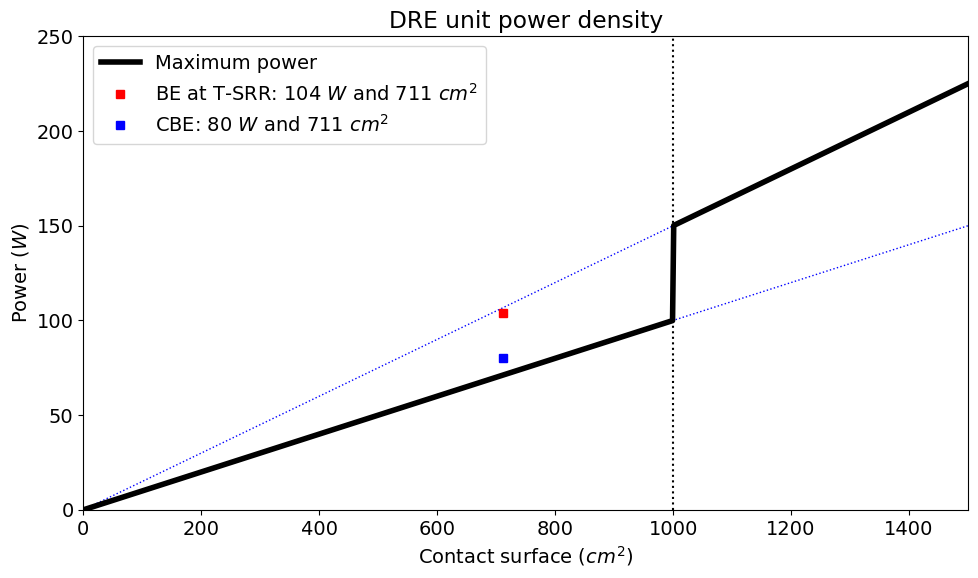

In [4]:
plt.rcParams.update({'font.size':14})
Npts=1000
surface=np.linspace(0, 2000, Npts)
flux_max_below_1000cm2=0.1 # W per cm^2
flux_max_over_1000cm2=0.15 # W per cm^2
S_lim=1000 # Surface at which the heat flux requirement changes (in cm2)

power_max=np.zeros(Npts)
index1=np.where(surface < S_lim)[0]
power_max[index1]=surface[index1]*flux_max_below_1000cm2
index2=np.where(surface >= S_lim)[0]
power_max[index2]=surface[index2]*flux_max_over_1000cm2
DRE_surface_1=888
DRE_dissip_1=164
DRE_surface_2=888
DRE_dissip_2=127
DRE_surface_3=DRE_surface_1+40
DRE_dissip_3=DRE_dissip_1-12
DRE_surface_4=int(22.8*31.2)  # I-SRR value
DRE_dissip_4=104  # I-SRR value
DRE_surface_5=DRE_surface_4  # conf 2023
DRE_dissip_5=80  # conf 2023


fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,1,1)
ax.plot(surface, surface*flux_max_below_1000cm2, ':', linewidth=1, color='b')
ax.plot(surface, surface*flux_max_over_1000cm2, ':', linewidth=1, color='b')
ax.plot(surface, power_max, linewidth=4, color='k', label='Maximum power')
ax.plot([S_lim, S_lim], [0, 300], ':k')
#ax.plot(DRE_surface_1, DRE_dissip_1, 'o', color='r', label='IRD V3 ({0:1d} $W$ and {1:1d} $cm^2$)'.format(DRE_dissip_1, DRE_surface_1))
#ax.plot(DRE_surface_2, DRE_dissip_2, 's', color='orange', label='New power estimate ({0:1d} $W$ and {1:1d} $cm^2$)'.format(DRE_dissip_2, DRE_surface_2))
ax.plot(DRE_surface_4, DRE_dissip_4, 's', color='r', label='BE at T-SRR: {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_4, DRE_surface_4))
ax.plot(DRE_surface_5, DRE_dissip_5, 's', color='b', label='CBE: {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_5, DRE_surface_5))
#ax.plot(DRE_surface_3, DRE_power_maj/1.2, 's', color='b', label='New power estimate no DMM ({0:3.0f}$W$) and $+40cm^2$'.format(DRE_power_maj/1.2))
#ax.plot(DRE_surface_2, DRE_dissip_2, '^', color='r', label='Expectation 1 (-6$W$ and $+25cm^2$)')
#ax.plot(DRE_surface_3, DRE_dissip_3, 'x', color='r', label='Expectation 2 (-12$W$ and $+40cm^2$)')
ax.set_title('DRE unit power density')
ax.set_xlabel('Contact surface ($cm^2$)')
ax.set_ylabel('Power ($W$)')
ax.set_xlim(0,1500)
ax.set_ylim(0,250)
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('DRE-power-dissipation.jpg', dpi=200, bbox_inches='tight')

